In [128]:
#This program predict if the stock of a company will increase or decrease 
#based on top news headlines
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [5]:
pip install textblob

In [129]:
nifty=pd.read_csv('nifty.csv')
nifty=nifty.head(100)
nifty['Close']

0     8626.250000
1     8514.000000
2     8484.950195
3     8433.750000
4     8497.049805
         ...     
95    9126.849609
96    9121.500000
97    9030.450195
98    9086.299805
99    9108.000000
Name: Close, Length: 100, dtype: float64

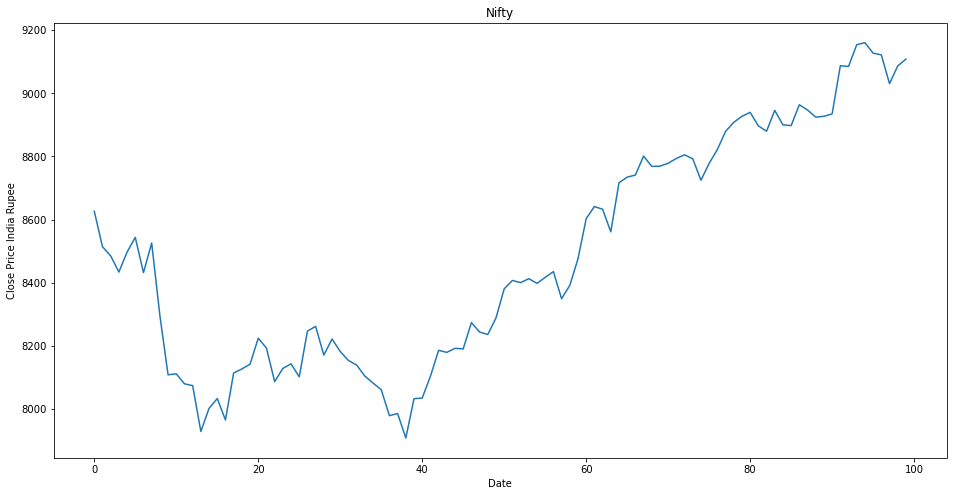

In [130]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Nifty')
plt.xlabel('Date')
plt.ylabel('Close Price India Rupee')
plt.plot(nifty['Close'])
plt.show()

In [131]:
#storing only close price in the dataframe
nifty=nifty[['Close']]
nifty

,Close
0,8626.250000
1,8514.000000
2,8484.950195
3,8433.750000
4,8497.049805
...,...
95,9126.849609
96,9121.500000
97,9030.450195
98,9086.299805


In [132]:
#Create a variable to predict 'x' days out into the future
future_days=25
#Create a new column (target) shifted 'x' up
nifty['Prediction']=nifty[['Close']].shift(-future_days)
nifty.head(30)

,Close,Prediction
0,8626.250000,8102.049805
1,8514.000000,8246.849609
2,8484.950195,8261.750000
3,8433.750000,8170.799805
4,8497.049805,8221.799805
5,8543.549805,8182.450195
6,8432.000000,8153.600098
7,8525.750000,8139.450195
8,8296.299805,8104.350098
9,8108.450195,8082.399902


In [108]:
nifty.tail(30)

,Close,Prediction
70,8778.400391,9126.849609
71,8793.549805,9121.500000
72,8805.049805,9030.450195
73,8792.299805,9086.299805
74,8724.700195,9108.000000
75,8778.000000,NaN
76,8821.700195,NaN
77,8879.200195,NaN
78,8907.849609,NaN
79,8926.900391,NaN


In [133]:
x=np.array(nifty.drop(['Prediction'],1))[:-future_days]
#Real close the top 75 data
print(x)

[[8626.25    ]
 [8514.      ]
 [8484.950195]
 [8433.75    ]
 [8497.049805]
 [8543.549805]
 [8432.      ]
 [8525.75    ]
 [8296.299805]
 [8108.450195]
 [8111.600098]
 [8079.950195]
 [8074.100098]
 [7929.100098]
 [8002.299805]
 [8033.299805]
 [7965.5     ]
 [8114.299805]
 [8126.899902]
 [8142.149902]
 [8224.5     ]
 [8192.900391]
 [8086.799805]
 [8128.75    ]
 [8143.149902]
 [8102.049805]
 [8246.849609]
 [8261.75    ]
 [8170.799805]
 [8221.799805]
 [8182.450195]
 [8153.600098]
 [8139.450195]
 [8104.350098]
 [8082.399902]
 [8061.299805]
 [7979.100098]
 [7985.75    ]
 [7908.25    ]
 [8032.850098]
 [8034.850098]
 [8103.600098]
 [8185.799805]
 [8179.5     ]
 [8192.25    ]
 [8190.5     ]
 [8273.799805]
 [8243.799805]
 [8236.049805]
 [8288.599609]
 [8380.650391]
 [8407.200195]
 [8400.349609]
 [8412.799805]
 [8398.      ]
 [8417.      ]
 [8435.099609]
 [8349.349609]
 [8391.5     ]
 [8475.799805]
 [8602.75    ]
 [8641.25    ]
 [8632.75    ]
 [8561.299805]
 [8716.400391]
 [8734.25    ]
 [8740.950

In [134]:
#create the target data set (y) and convert it to a numpy array and get all the 
#Prediction top 75 data points
y=np.array(nifty['Prediction'])[:-future_days]
print(y)

[8102.049805 8246.849609 8261.75     8170.799805 8221.799805 8182.450195
 8153.600098 8139.450195 8104.350098 8082.399902 8061.299805 7979.100098
 7985.75     7908.25     8032.850098 8034.850098 8103.600098 8185.799805
 8179.5      8192.25     8190.5      8273.799805 8243.799805 8236.049805
 8288.599609 8380.650391 8407.200195 8400.349609 8412.799805 8398.
 8417.       8435.099609 8349.349609 8391.5      8475.799805 8602.75
 8641.25     8632.75     8561.299805 8716.400391 8734.25     8740.950195
 8801.049805 8768.299805 8769.049805 8778.400391 8793.549805 8805.049805
 8792.299805 8724.700195 8778.       8821.700195 8879.200195 8907.849609
 8926.900391 8939.5      8896.700195 8879.599609 8945.799805 8899.75
 8897.549805 8963.450195 8946.900391 8924.299805 8927.       8934.549805
 9087.       9084.799805 9153.700195 9160.049805 9126.849609 9121.5
 9030.450195 9086.299805 9108.      ]


In [135]:
#Split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [136]:
#Create the models
#Create the decision tree regressor model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr=LinearRegression().fit(x_train,y_train)


In [115]:
#get the last x rows of the feature dataset
x_future=nifty.drop(['Prediction'],1)[:-future_days]
#This is the data of botton 25 of top 75 x data points which is real close
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[8380.650391],
       [8407.200195],
       [8400.349609],
       [8412.799805],
       [8398.      ],
       [8417.      ],
       [8435.099609],
       [8349.349609],
       [8391.5     ],
       [8475.799805],
       [8602.75    ],
       [8641.25    ],
       [8632.75    ],
       [8561.299805],
       [8716.400391],
       [8734.25    ],
       [8740.950195],
       [8801.049805],
       [8768.299805],
       [8769.049805],
       [8778.400391],
       [8793.549805],
       [8805.049805],
       [8792.299805],
       [8724.700195]])

In [116]:
#show the model  Prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)


[8778.       8907.849609 8879.200195 8907.849609 8879.200195 8907.849609
 8896.700195 8879.599609 8945.799805 8899.75     8897.549805 8963.450195
 8102.049805 8182.450195 8927.       8934.549805 9087.       9084.799805
 9160.049805 9160.049805 9126.849609 9084.799805 9030.450195 9084.799805
 9108.      ]


<function print>

In [117]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[8603.99991006 8621.82455858 8617.22530476 8625.58394905 8615.64785603
 8628.40381919 8640.55529001 8582.98561416 8611.28397389 8667.88003743
 8753.11014326 8778.95775283 8773.25113773 8725.28187166 8829.41120647
 8841.39483568 8845.89312202 8886.24198577 8864.25473348 8864.75825834
 8871.03592837 8881.20673716 8888.9274517  8880.36752905 8834.98341669]


<ipython-input-119-519c1a98d218>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


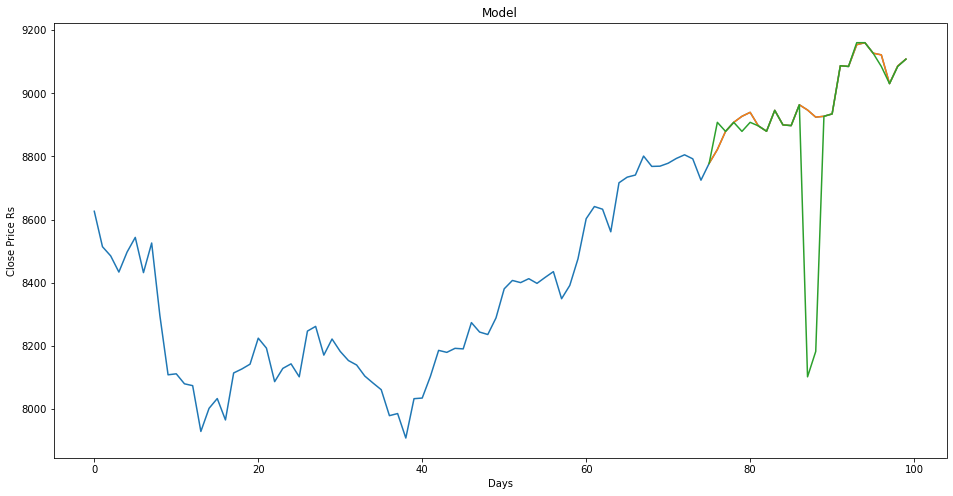

In [119]:
#visulize the data
predictions=tree_prediction
valid=nifty[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price Rs')
plt.plot(nifty['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()

<ipython-input-120-6b28dc1715bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


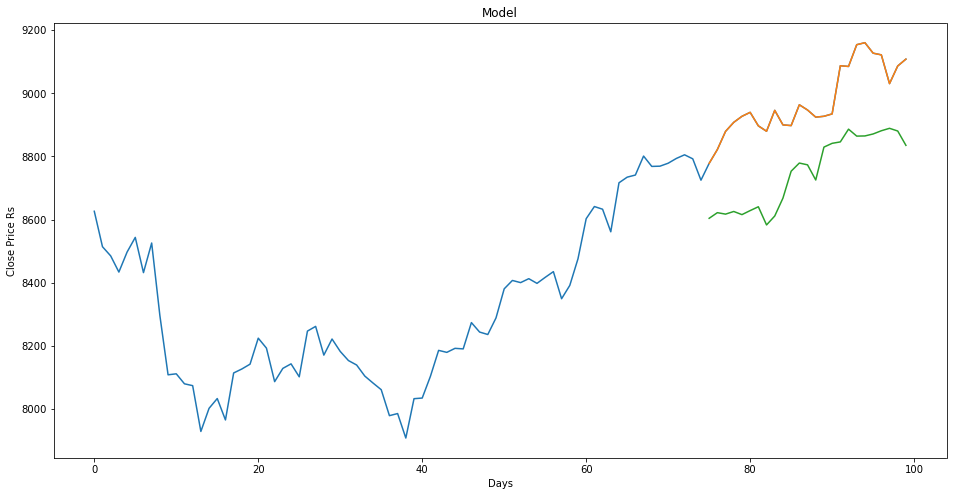

In [120]:
#visulize the data
predictions=lr_prediction
valid=nifty[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price Rs')
plt.plot(nifty['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()

In [137]:
print(valid)

          Close  Prediction  Predictions
75  8778.000000         NaN  8603.999910
76  8821.700195         NaN  8621.824559
77  8879.200195         NaN  8617.225305
78  8907.849609         NaN  8625.583949
79  8926.900391         NaN  8615.647856
80  8939.500000         NaN  8628.403819
81  8896.700195         NaN  8640.555290
82  8879.599609         NaN  8582.985614
83  8945.799805         NaN  8611.283974
84  8899.750000         NaN  8667.880037
85  8897.549805         NaN  8753.110143
86  8963.450195         NaN  8778.957753
87  8946.900391         NaN  8773.251138
88  8924.299805         NaN  8725.281872
89  8927.000000         NaN  8829.411206
90  8934.549805         NaN  8841.394836
91  9087.000000         NaN  8845.893122
92  9084.799805         NaN  8886.241986
93  9153.700195         NaN  8864.254733
94  9160.049805         NaN  8864.758258
95  9126.849609         NaN  8871.035928
96  9121.500000         NaN  8881.206737
97  9030.450195         NaN  8888.927452
98  9086.299805 

In [138]:
print(nifty[x.shape[0]:])

          Close  Prediction
75  8778.000000         NaN
76  8821.700195         NaN
77  8879.200195         NaN
78  8907.849609         NaN
79  8926.900391         NaN
80  8939.500000         NaN
81  8896.700195         NaN
82  8879.599609         NaN
83  8945.799805         NaN
84  8899.750000         NaN
85  8897.549805         NaN
86  8963.450195         NaN
87  8946.900391         NaN
88  8924.299805         NaN
89  8927.000000         NaN
90  8934.549805         NaN
91  9087.000000         NaN
92  9084.799805         NaN
93  9153.700195         NaN
94  9160.049805         NaN
95  9126.849609         NaN
96  9121.500000         NaN
97  9030.450195         NaN
98  9086.299805         NaN
99  9108.000000         NaN


In [142]:
x.shape[0]

75

In [143]:
print(nifty[75:])

          Close  Prediction
75  8778.000000         NaN
76  8821.700195         NaN
77  8879.200195         NaN
78  8907.849609         NaN
79  8926.900391         NaN
80  8939.500000         NaN
81  8896.700195         NaN
82  8879.599609         NaN
83  8945.799805         NaN
84  8899.750000         NaN
85  8897.549805         NaN
86  8963.450195         NaN
87  8946.900391         NaN
88  8924.299805         NaN
89  8927.000000         NaN
90  8934.549805         NaN
91  9087.000000         NaN
92  9084.799805         NaN
93  9153.700195         NaN
94  9160.049805         NaN
95  9126.849609         NaN
96  9121.500000         NaN
97  9030.450195         NaN
98  9086.299805         NaN
99  9108.000000         NaN
